# Overview

This notebook processes and visualizes the demographic (census) data for each of the three service areas around the Mount Hood and Columbia River Gorge Recreation Area.

# Setup

In [1]:
# Import libraries
import arcpy, pandas as pd, numpy as np, arcgis, os
import matplotlib.pyplot as plt, seaborn as sns
from arcgis.features import GeoAccessor, GeoSeriesAccessor

In [45]:
# Magic commands
%matplotlib inline

In [2]:
# Set workspace settings
arcpy.env.workspace  =  r"C:\Users\kathr\Documents\outdoor-alliance\mt-hood\mt-hood-analysis\mh_output.gdb"
arcpy.env.overwriteOutput = True

In [3]:
# Set gdb path
gdb_path =  r"C:\Users\kathr\Documents\outdoor-alliance\mt-hood\mt-hood-analysis\mh_output.gdb"

# Set visualization folder
viz_path = r"C:\Users\kathr\Documents\outdoor-alliance\mt-hood\viz"

# Service Area with Rings

"Rings" means that the inner service areas are not included in the outer service areas. For example, the 5-30 mile service area does not include the 0-5 mile service area.

## Demographic Profiles - Race/Ethnicity

### 0 - 5 mile service area

In [201]:
# Create pandas dataframe from feature class
sa_1_census_df = pd.DataFrame.spatial.from_featureclass("combined_census_sa_1_rings")

In [202]:
# View the dataframe
sa_1_census_df.head()

,OBJECTID,GEOID,NAME,County_Name,State_Name,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,P0010011,P0010012,P0010013,P0010014,P0010015,P0010016,P0010017,P0010018,P0010019,P0010020,P0010021,P0010022,P0010023,P0010024,P0010025,P0010026,P0010027,P0010028,P0010029,P0010030,P0010031,P0010032,P0010033,P0010034,P0010035,...,NMEMI,CNECTA,NECTADIV,CBSAPCI,NECTAPCI,UA,UATYPE,UR,CD116,SLDU18,SLDL18,VTD,VTDI,ZCTA,SDELM,SDSEC,SDUNI,PUMA,AREALAND,AREAWATR,AWATER,ALAND,INTPTLON,INTPTLAT,BASENAME,FUNCSTAT,GCUNI,POP100,HU100,PARTFLAG,UGA,AMRZE001,AMRZE022,AMRZE023,AMRZE024,AMRZE025,AMZME001,AMZME002,AMZME003,SHAPE
0,1,4.102795e+10,Census Tract 9501,Hood River County,Oregon,147.188297,125.717134,101.566211,0.198501,2.249675,1.687256,0.297751,19.717740,21.471163,20.908744,0.794003,3.705347,0.926337,0.165417,15.086056,0.000000,0.000000,0.000000,0.066167,0.000000,0.033083,0.033083,0.099250,0.0,0.0,0.496252,0.000000,0.000000,0.000000,0.000000,0.066167,0.033083,0.330835,0.000000,0.000000,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1080381908,18046053,5.970258e+05,3.574277e+07,-121.6818391,+45.4966594,9501,S,None,4449,1963,None,None,104.014387,15.052973,5.061769,1.720340,0.463168,153.804989,3.936931,14.722138,"{""rings"": [[[-13572297.1728, 5722769.774300002..."
1,2,4.105101e+10,Census Tract 105,Multnomah County,Oregon,374.220839,346.346269,331.081624,1.896229,1.137738,5.404253,1.137738,5.688688,27.874570,26.357586,1.611795,8.627843,5.404253,0.568869,9.860392,0.189623,0.000000,0.000000,0.000000,0.000000,0.094811,0.000000,0.000000,0.0,0.0,1.516983,0.094811,0.189623,0.094811,0.094811,0.189623,0.000000,0.568869,0.094811,0.094811,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,471839859,25556898,2.423087e+06,4.473583e+07,-122.0852690,+45.5281048,105,S,None,3947,1548,None,None,273.341444,79.262382,26.262775,6.636802,6.447179,392.519451,19.531161,7.490105,"{""rings"": [[[-13584172.1728, 5718059.774300002..."
2,3,4.106597e+10,Census Tract 9701,Wasco County,Oregon,0.970772,0.859801,0.752268,0.004127,0.013757,0.014215,0.005961,0.069472,0.110972,0.108220,0.004127,0.021094,0.005273,0.001834,0.074057,0.000000,0.000000,0.000459,0.000000,0.000000,0.000000,0.000917,0.000459,0.0,0.0,0.002064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000688,0.000459,0.000229,0.000688,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,10531266,1517829,3.480081e+02,2.414610e+03,-121.1448017,+45.5958291,9701,S,None,4234,1745,None,None,0.634877,0.118996,0.039665,0.014674,0.023157,0.797895,0.018342,0.042417,"{""rings"": [[[-13488789.188900001, 5715998.3081..."
3,4,4.106597e+10,Census Tract 9702,Wasco County,Oregon,1723.533755,1478.824219,1251.911740,11.123161,21.690163,24.470954,25.583270,144.044931,244.709536,233.030217,11.679319,58.952752,12.791635,7.786213,135.702561,0.000000,0.000000,0.000000,1.668474,0.000000,0.000000,2.780790,1.668474,0.0,0.0,7.230054,0.556158,0.000000,0.000000,0.000000,1.668474,0.000000,2.780790,1.112316,0.000000,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1962428,157042,8.734017e+04,1.091420e+06,-121.1808395,+45.5980619,9702,S,None,3099,1309,None,None,1001.640624,92.878392,37.818746,8.342371,8.342371,1566.141031,34.481798,158.505040,"{""rings"": [[[-13489913.5971, 5717197.855400003..."
4,5,4.106597e+10,Census Tract 9703,Wasco County,Oregon,1117.077226,984.490979,887.718259,5.714924,11.810844,12.191839,3.047960,64.007153,132.586246,125.728337,8.000894,19.430743,6.095919,4.190945,86.104861,0.000000,0.380995,0.000000,0.380995,0.380995,0.000000,0.761990,0.000000,0.0,0.0,5.714924,0.000000,0.000000,0.380995,0.000000,1.142985,0.380995,1.904975,0.380995,0.761990,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,3981958,0,0.000000e+00,1.517106e+06,-121.1918496,+45.5878834,9703,S,None,2932,1185,No

In [203]:
# Caculate percentages of each race for each census tract
sa_1_census_df["PCT_P0020002"] = np.round(100 * (sa_1_census_df["P0020002"] / sa_1_census_df["P0010001"]), 2) # pct hispanic or latino
sa_1_census_df["PCT_P0020005"] = np.round(100 * (sa_1_census_df["P0020005"] / sa_1_census_df["P0010001"]), 2) # pct white
sa_1_census_df["PCT_P0020006"] = np.round(100 * (sa_1_census_df["P0020006"] / sa_1_census_df["P0010001"]), 2) # pct Black
sa_1_census_df["PCT_P0020007"] = np.round(100 * (sa_1_census_df["P0020007"] / sa_1_census_df["P0010001"]), 2) # pct american indian/alaska native
sa_1_census_df["PCT_P0020008"] = np.round(100 * (sa_1_census_df["P0020008"] / sa_1_census_df["P0010001"]), 2) # pct asian
sa_1_census_df["PCT_P0020009"] = np.round(100 * (sa_1_census_df["P0020009"] / sa_1_census_df["P0010001"]), 2) # pct native hawaiian/pacific islander
sa_1_census_df["PCT_P0020010"] = np.round(100 * (sa_1_census_df["P0020010"] / sa_1_census_df["P0010001"]), 2) # pct other
sa_1_census_df["PCT_P0020011"] = np.round(100 * (sa_1_census_df["P0020011"] / sa_1_census_df["P0010001"]), 2) # pct two+ races

In [204]:
# Calculate total pct of each race for the entire service area
cols = ["P0020002", # hispanic/latino - not included in the remaining categories
        "P0020005", # white
        "P0020006", # Black
        "P0020007", # american indian/alaska native
        "P0020008", # asian
        "P0020009", # native hawaiian
        "P0020010", # other
        "P0020011"] # two+ races
col_names = ["Hispanic/Latino",
            "White",
            "Black",
            "American Indian/Alaska Native",
            "Asian",
            "Native Hawaiian/Pacific Islander",
            "Other Race",
            "Multiracial (2+ Races)"]

summary_df = pd.DataFrame()
summary_df["Race"] = col_names

total_pop = sum(sa_1_census_df["P0010001"])
summary_df["PCT_SA_1"] = [np.round(100 * (sum(sa_1_census_df[col])/total_pop), 2) for col in cols]

In [205]:
# Most prevalent race/ethnic group
# https://www.census.gov/newsroom/blogs/random-samplings/2021/08/measuring-racial-ethnic-diversity-2020-census.html

pct_cols = ["PCT_P0020002", # hispanic/latino - not included in the remaining categories
        "PCT_P0020005", # white
        "PCT_P0020006", # Black
        "PCT_P0020007", # american indian/alaska native
        "PCT_P0020008", # asian
        "PCT_P0020009", # native hawaiian
        "PCT_P0020010", # other
        "PCT_P0020011"] # two+ races

max_cols = sa_1_census_df[pct_cols].idxmax(axis=1)

# Replace column names with readable values
max_cols = max_cols.replace("PCT_P0020002", "Hispanic/Latino")
max_cols = max_cols.replace("PCT_P0020005", "White")
max_cols = max_cols.replace("PCT_P0020006", "Black")
max_cols = max_cols.replace("PCT_P0020007", "American Indian/Alaska Native")
max_cols = max_cols.replace("PCT_P0020008", "Asian")
max_cols = max_cols.replace("PCT_P0020009", "Native Hawaiian/Pacific Islander")
max_cols = max_cols.replace("PCT_P0020010", "Other Race")
max_cols = max_cols.replace("PCT_P0020011", "Two or More Races")

In [206]:
# Add column to original census df for most prevalent race/ethnicity
sa_1_census_df["Prevalent_Race"] = max_cols

### 5 - 30 mile service area

In [207]:
# Create pandas dataframe from feature class
sa_2_census_df = pd.DataFrame.spatial.from_featureclass("combined_census_sa_2_rings")

In [208]:
# Caculate percentages of each race for each census tract
sa_2_census_df["PCT_P0020002"] = np.round(100 * (sa_2_census_df["P0020002"] / sa_2_census_df["P0010001"]), 2) # pct hispanic or latino
sa_2_census_df["PCT_P0020005"] = np.round(100 * (sa_2_census_df["P0020005"] / sa_2_census_df["P0010001"]), 2) # pct white
sa_2_census_df["PCT_P0020006"] = np.round(100 * (sa_2_census_df["P0020006"] / sa_2_census_df["P0010001"]), 2) # pct Black
sa_2_census_df["PCT_P0020007"] = np.round(100 * (sa_2_census_df["P0020007"] / sa_2_census_df["P0010001"]), 2) # pct american indian/alaska native
sa_2_census_df["PCT_P0020008"] = np.round(100 * (sa_2_census_df["P0020008"] / sa_2_census_df["P0010001"]), 2) # pct asian
sa_2_census_df["PCT_P0020009"] = np.round(100 * (sa_2_census_df["P0020009"] / sa_2_census_df["P0010001"]), 2) # pct native hawaiian/pacific islander
sa_2_census_df["PCT_P0020010"] = np.round(100 * (sa_2_census_df["P0020010"] / sa_2_census_df["P0010001"]), 2) # pct other
sa_2_census_df["PCT_P0020011"] = np.round(100 * (sa_2_census_df["P0020011"] / sa_2_census_df["P0010001"]), 2) # pct two+ races

In [209]:
# Calculate total pct of each race for the entire service area
total_pop = sum(sa_2_census_df["P0010001"])

summary_df["PCT_SA_2"] = [np.round(100 * (sum(sa_2_census_df[col])/total_pop), 2) for col in cols]

In [210]:
# Most prevalent race/ethnic group
# https://www.census.gov/newsroom/blogs/random-samplings/2021/08/measuring-racial-ethnic-diversity-2020-census.html

max_cols = sa_2_census_df[pct_cols].idxmax(axis=1)

# Replace column names with readable values
max_cols = max_cols.replace("PCT_P0020002", "Hispanic/Latino")
max_cols = max_cols.replace("PCT_P0020005", "White")
max_cols = max_cols.replace("PCT_P0020006", "Black")
max_cols = max_cols.replace("PCT_P0020007", "American Indian/Alaska Native")
max_cols = max_cols.replace("PCT_P0020008", "Asian")
max_cols = max_cols.replace("PCT_P0020009", "Native Hawaiian/Pacific Islander")
max_cols = max_cols.replace("PCT_P0020010", "Other Race")
max_cols = max_cols.replace("PCT_P0020011", "Two or More Races")

In [211]:
# Add column to original census df for most prevalent race/ethnicity
sa_2_census_df["Prevalent_Race"] = max_cols

### 30 - 90 mile service area

In [212]:
# Create pandas dataframe from feature class
sa_3_census_df = pd.DataFrame.spatial.from_featureclass("combined_census_sa_3_rings") 

In [213]:
# Caculate percentages of each race for each census tract
sa_3_census_df["PCT_P0020002"] = np.round(100 * (sa_3_census_df["P0020002"] / sa_3_census_df["P0010001"]), 2) # pct hispanic or latino
sa_3_census_df["PCT_P0020005"] = np.round(100 * (sa_3_census_df["P0020005"] / sa_3_census_df["P0010001"]), 2) # pct white
sa_3_census_df["PCT_P0020006"] = np.round(100 * (sa_3_census_df["P0020006"] / sa_3_census_df["P0010001"]), 2) # pct Black
sa_3_census_df["PCT_P0020007"] = np.round(100 * (sa_3_census_df["P0020007"] / sa_3_census_df["P0010001"]), 2) # pct american indian/alaska native
sa_3_census_df["PCT_P0020008"] = np.round(100 * (sa_3_census_df["P0020008"] / sa_3_census_df["P0010001"]), 2) # pct asian
sa_3_census_df["PCT_P0020009"] = np.round(100 * (sa_3_census_df["P0020009"] / sa_3_census_df["P0010001"]), 2) # pct native hawaiian/pacific islander
sa_3_census_df["PCT_P0020010"] = np.round(100 * (sa_3_census_df["P0020010"] / sa_3_census_df["P0010001"]), 2) # pct other
sa_3_census_df["PCT_P0020011"] = np.round(100 * (sa_3_census_df["P0020011"] / sa_3_census_df["P0010001"]), 2) # pct two+ races

In [214]:
# Calculate total pct of each race for the entire service area
total_pop = sum(sa_3_census_df["P0010001"])

summary_df["PCT_SA_3"] = [np.round(100 * (sum(sa_3_census_df[col])/total_pop), 2) for col in cols]

In [215]:
# Most prevalent race/ethnic group
# https://www.census.gov/newsroom/blogs/random-samplings/2021/08/measuring-racial-ethnic-diversity-2020-census.html

max_cols = sa_3_census_df[pct_cols].idxmax(axis=1)

# Replace column names with readable values
max_cols = max_cols.replace("PCT_P0020002", "Hispanic/Latino")
max_cols = max_cols.replace("PCT_P0020005", "White")
max_cols = max_cols.replace("PCT_P0020006", "Black")
max_cols = max_cols.replace("PCT_P0020007", "American Indian/Alaska Native")
max_cols = max_cols.replace("PCT_P0020008", "Asian")
max_cols = max_cols.replace("PCT_P0020009", "Native Hawaiian/Pacific Islander")
max_cols = max_cols.replace("PCT_P0020010", "Other Race")
max_cols = max_cols.replace("PCT_P0020011", "Two or More Races")

In [216]:
# Add column to original census df for most prevalent race/ethnicity
sa_3_census_df["Prevalent_Race"] = max_cols

### Entire states of WA and OR

In [217]:
# Create pandas dataframe from feature class
wa_or_census_df = pd.DataFrame.spatial.from_featureclass("wa_or_census")

In [218]:
# Caculate percentages of each race for each census tract
wa_or_census_df["PCT_P0020002"] = np.round(100 * (wa_or_census_df["P0020002"] / wa_or_census_df["P0010001"]), 2) # pct hispanic or latino
wa_or_census_df["PCT_P0020005"] = np.round(100 * (wa_or_census_df["P0020005"] / wa_or_census_df["P0010001"]), 2) # pct white
wa_or_census_df["PCT_P0020006"] = np.round(100 * (wa_or_census_df["P0020006"] / wa_or_census_df["P0010001"]), 2) # pct Black
wa_or_census_df["PCT_P0020007"] = np.round(100 * (wa_or_census_df["P0020007"] / wa_or_census_df["P0010001"]), 2) # pct american indian/alaska native
wa_or_census_df["PCT_P0020008"] = np.round(100 * (wa_or_census_df["P0020008"] / wa_or_census_df["P0010001"]), 2) # pct asian
wa_or_census_df["PCT_P0020009"] = np.round(100 * (wa_or_census_df["P0020009"] / wa_or_census_df["P0010001"]), 2) # pct native hawaiian/pacific islander
wa_or_census_df["PCT_P0020010"] = np.round(100 * (wa_or_census_df["P0020010"] / wa_or_census_df["P0010001"]), 2) # pct other
wa_or_census_df["PCT_P0020011"] = np.round(100 * (wa_or_census_df["P0020011"] / wa_or_census_df["P0010001"]), 2) # pct two+ races

In [219]:
# Calculate total pct of each race for the entire state
total_pop = sum(wa_or_census_df["P0010001"])

summary_df["PCT_WA/OR"] = [np.round(100 * (sum(wa_or_census_df[col])/total_pop), 2) for col in cols]

In [220]:
# View the summary dataframe
summary_df

,Race,PCT_SA_1,PCT_SA_2,PCT_SA_3,PCT_WA/OR
0,Hispanic/Latino,22.10,13.59,16.33,13.80
1,White,69.03,66.02,68.97,66.61
2,Black,0.45,4.46,1.49,3.14
3,American Indian/Alaska Native,1.22,0.70,1.14,1.12
4,Asian,0.96,7.31,5.11,7.66
5,Native Hawaiian/Pacific Islander,1.03,0.81,0.52,0.68
6,Other Race,0.33,0.55,0.51,0.55
7,Multiracial (2+ Races),4.88,6.54,5.92,6.45


### Plots

In [221]:
# Reshape summary_df to long format
summary_long = pd.melt(summary_df, id_vars = ["Race"])
summary_long.head()

,Race,variable,value
0,Hispanic/Latino,PCT_SA_1,22.10
1,White,PCT_SA_1,69.03
2,Black,PCT_SA_1,0.45
3,American Indian/Alaska Native,PCT_SA_1,1.22
4,Asian,PCT_SA_1,0.96


In [222]:
# Sort dataframe to get the correct plotting order
summary_sorted = summary_df.sort_values(by = "PCT_SA_1", ascending = False)

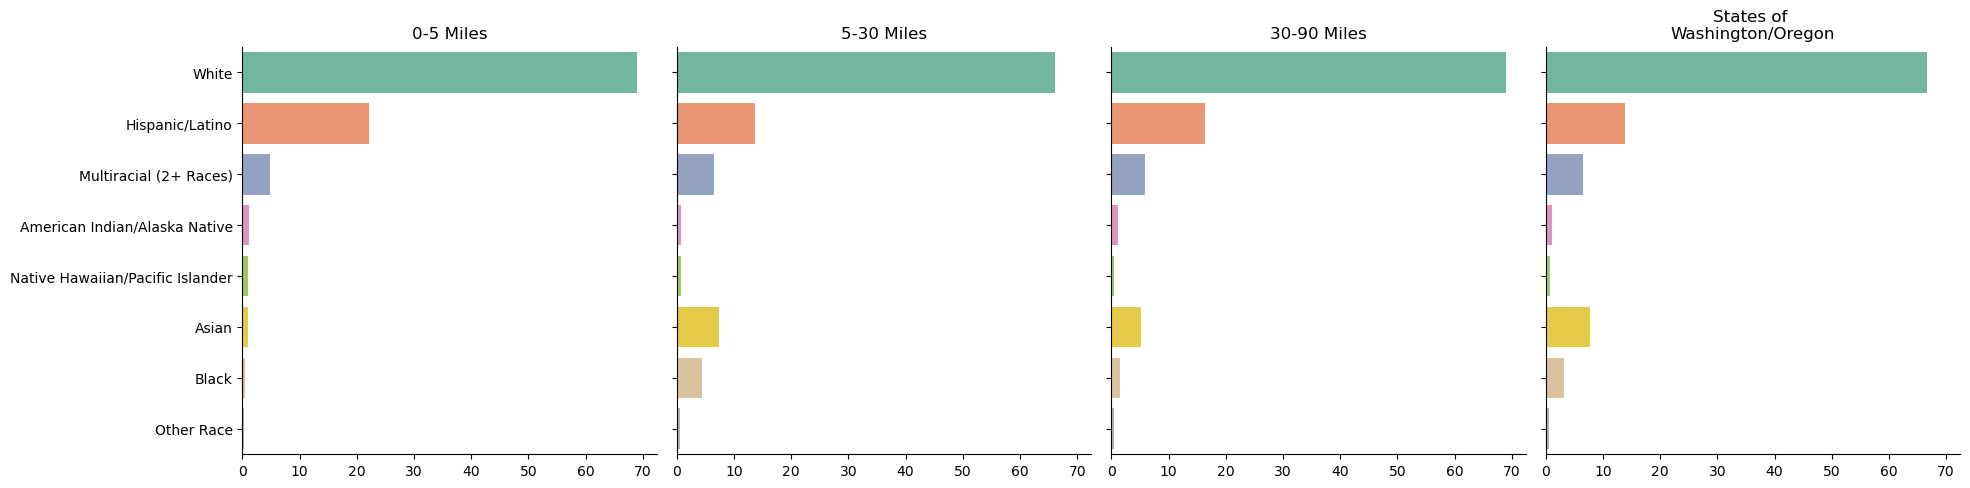

In [223]:
# Plot pct of each race for each service area - summary_df

# Create plot
p = sns.catplot(data = summary_long,
                x = "value",
                y = "Race",
                col = "variable",
                kind = "bar",
                palette = "Set2",
                order = summary_sorted["Race"].values) # most prevalent at the top

# Change individual plot titles
axes = p.axes.flatten()
axes[0].set_title("0-5 Miles")
axes[1].set_title("5-30 Miles")
axes[2].set_title("30-90 Miles")
axes[3].set_title("States of \nWashington/Oregon")

# Change axis labels
p.set_axis_labels(x_var = "", # or Percent
                 y_var = "")

# Export plot
plt.savefig(os.path.join(viz_path, "race_pct.png"))

### Write updated dfs back to feature classes

In [165]:
# Write dataframes back to feature class so the updated columns can be mapped
sa_1_census_df.copy().spatial.to_featureclass(location=os.path.join(gdb_path, "updated_sa_1_rings_census"), 
                                        sanitize_columns=False)
sa_2_census_df.copy().spatial.to_featureclass(location=os.path.join(gdb_path, "updated_sa_2_rings_census"), 
                                        sanitize_columns=False)
sa_3_census_df.copy().spatial.to_featureclass(location=os.path.join(gdb_path, "updated_sa_3_rings_census"), 
                                        sanitize_columns=False)

'C:\\Users\\kathr\\Documents\\outdoor-alliance\\mt-hood\\mt-hood-analysis\\mh_output.gdb\\updated_sa_3_rings_census'

## Demographic Profiles - Education

### Summary Table

In [224]:
# Create dataframes from feature classes
sa_1_census_df = pd.DataFrame.spatial.from_featureclass("updated_sa_1_rings_census")
sa_2_census_df = pd.DataFrame.spatial.from_featureclass("updated_sa_2_rings_census")
sa_3_census_df = pd.DataFrame.spatial.from_featureclass("updated_sa_3_rings_census")
wa_or_census_df = pd.DataFrame.spatial.from_featureclass("combined_wa_or_census")

In [225]:
# Create empty dataframe to hold summary information
summary_df = pd.DataFrame()

In [226]:
edu_cols = ["AMRZE022", # Bachelor's degree 
            "AMRZE023", # Master's degree 
            "AMRZE024", # Professional school degree 
            "AMRZE025"] # Doctorate degree 

In [227]:
sa_1_census_df["Bach_Higher_Count"] = sa_1_census_df[edu_cols].sum(axis = 1)
sa_2_census_df["Bach_Higher_Count"] = sa_2_census_df[edu_cols].sum(axis = 1)
sa_3_census_df["Bach_Higher_Count"] = sa_3_census_df[edu_cols].sum(axis = 1)
wa_or_census_df["Bach_Higher_Count"] = wa_or_census_df[edu_cols].sum(axis = 1)

In [228]:
sa_1_census_df["Bach_Higher_Pct"] = 100 * (sa_1_census_df["Bach_Higher_Count"] / sa_1_census_df["AMRZE001"])
sa_2_census_df["Bach_Higher_Pct"] = 100 * (sa_2_census_df["Bach_Higher_Count"] / sa_2_census_df["AMRZE001"])
sa_3_census_df["Bach_Higher_Pct"] = 100 * (sa_3_census_df["Bach_Higher_Count"] / sa_3_census_df["AMRZE001"])

In [229]:
summary_df["PCT_SA_1"] = [np.round(100 * (sum(sa_1_census_df["Bach_Higher_Count"])/sum(sa_1_census_df["AMRZE001"])), 2)]
summary_df["PCT_SA_2"] = [np.round(100 * (sum(sa_2_census_df["Bach_Higher_Count"])/sum(sa_2_census_df["AMRZE001"])), 2)]
summary_df["PCT_SA_3"] = [np.round(100 * (sum(sa_3_census_df["Bach_Higher_Count"])/sum(sa_3_census_df["AMRZE001"])), 2)]
summary_df["PCT_WA/OR"] = [np.round(100 * (sum(wa_or_census_df["Bach_Higher_Count"])/sum(wa_or_census_df["AMRZE001"])), 2)]

In [144]:
summary_df

,PCT_SA_1,PCT_SA_2,PCT_SA_3,PCT_WA/OR
0,19.16,38.89,35.48,35.86


### Plots

In [230]:
# Reshape summary_df to long format
summary_long = pd.melt(summary_df)
summary_long.head()

,variable,value
0,PCT_SA_1,19.16
1,PCT_SA_2,38.89
2,PCT_SA_3,35.48
3,PCT_WA/OR,35.86


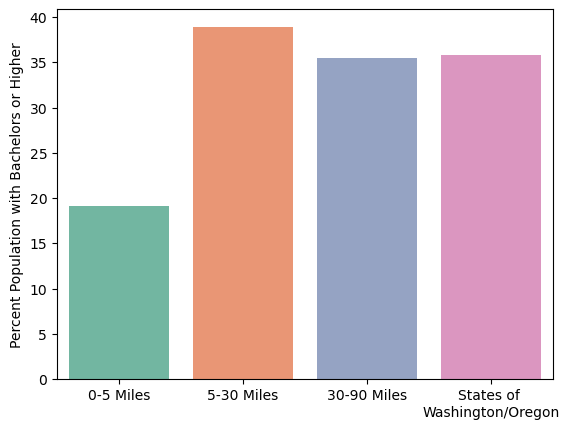

In [231]:
# Create barplot
p = sns.barplot(data = summary_long,
           x = "variable",
           y = "value",
           palette = "Set2")

# Change axis labels
p.set_xlabel("")
p.set_ylabel("Percent Population with Bachelors or Higher")

# Change tick labels
p.set_xticklabels(["0-5 Miles", "5-30 Miles", "30-90 Miles", "States of \nWashington/Oregon"])

# Export plot
plt.savefig(os.path.join(viz_path, "edu_pct.png"))

### Write updated dfs back to feature classes

In [41]:
# Write dataframes back to feature class so the updated columns can be mapped
sa_1_census_df.copy().spatial.to_featureclass(location=os.path.join(gdb_path, "updated_sa_1_rings_census"), 
                                        sanitize_columns=False)
sa_2_census_df.copy().spatial.to_featureclass(location=os.path.join(gdb_path, "updated_sa_2_rings_census"), 
                                        sanitize_columns=False)
sa_3_census_df.copy().spatial.to_featureclass(location=os.path.join(gdb_path, "updated_sa_3_rings_census"), 
                                        sanitize_columns=False)

'C:\\Users\\kathr\\Documents\\outdoor-alliance\\mt-hood\\mt-hood-analysis\\mh_output.gdb\\updated_sa_3_rings_census'

## Demographic Profiles - Income

### Summary Table

In [232]:
# Create dataframes from feature classes
sa_1_census_df = pd.DataFrame.spatial.from_featureclass("updated_sa_1_rings_census")
sa_2_census_df = pd.DataFrame.spatial.from_featureclass("updated_sa_2_rings_census")
sa_3_census_df = pd.DataFrame.spatial.from_featureclass("updated_sa_3_rings_census")
wa_or_census_df = pd.DataFrame.spatial.from_featureclass("combined_wa_or_census")

In [233]:
# Create empty dataframe to hold summary information
summary_df = pd.DataFrame()

In [234]:
inc_cols = ["AMZME002", # Under .50
            "AMZME003"] # .50 - .99 

In [235]:
sa_1_census_df["Below_Pov_Line_Count"] = sa_1_census_df[inc_cols].sum(axis = 1)
sa_2_census_df["Below_Pov_Line_Count"] = sa_2_census_df[inc_cols].sum(axis = 1)
sa_3_census_df["Below_Pov_Line_Count"] = sa_3_census_df[inc_cols].sum(axis = 1)
wa_or_census_df["Below_Pov_Line_Count"] = wa_or_census_df[inc_cols].sum(axis = 1)

In [236]:
sa_1_census_df["Below_Pov_Line_Pct"] = 100 * (sa_1_census_df["Below_Pov_Line_Count"] / sa_1_census_df["AMZME001"])
sa_2_census_df["Below_Pov_Line_Pct"] = 100 * (sa_2_census_df["Below_Pov_Line_Count"] / sa_2_census_df["AMZME001"])
sa_3_census_df["Below_Pov_Line_Pct"] = 100 * (sa_3_census_df["Below_Pov_Line_Count"] / sa_3_census_df["AMZME001"])

In [237]:
summary_df["PCT_SA_1"] = [np.round(100 * (sum(sa_1_census_df["Below_Pov_Line_Count"])/sum(sa_1_census_df["AMZME001"])), 2)]
summary_df["PCT_SA_2"] = [np.round(100 * (sum(sa_2_census_df["Below_Pov_Line_Count"])/sum(sa_2_census_df["AMZME001"])), 2)]
summary_df["PCT_SA_3"] = [np.round(100 * (sum(sa_3_census_df["Below_Pov_Line_Count"])/sum(sa_3_census_df["AMZME001"])), 2)]
summary_df["PCT_WA/OR"] = [np.round(100 * (sum(wa_or_census_df["Below_Pov_Line_Count"])/sum(wa_or_census_df["AMZME001"])), 2)]

In [238]:
summary_df

,PCT_SA_1,PCT_SA_2,PCT_SA_3,PCT_WA/OR
0,13.54,12.42,10.04,10.97


### Plots

In [239]:
# Reshape summary_df to long format
summary_long = pd.melt(summary_df)
summary_long.head()

,variable,value
0,PCT_SA_1,13.54
1,PCT_SA_2,12.42
2,PCT_SA_3,10.04
3,PCT_WA/OR,10.97


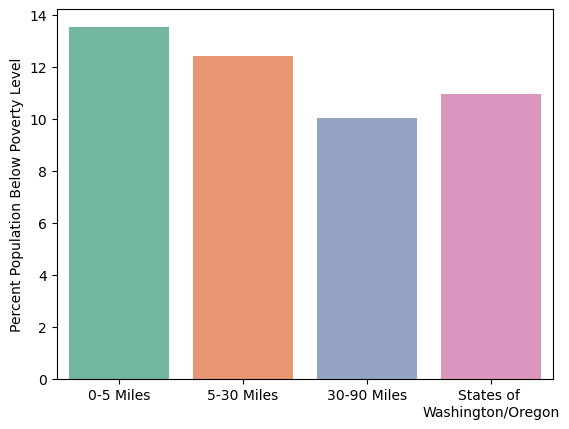

In [240]:
# Create barplot
p = sns.barplot(data = summary_long,
           x = "variable",
           y = "value",
           palette = "Set2")

# Change axis labels
p.set_xlabel("")
p.set_ylabel("Percent Population Below Poverty Level")

# Change tick labels
p.set_xticklabels(["0-5 Miles", "5-30 Miles", "30-90 Miles", "States of \nWashington/Oregon"])

# Export plot
plt.savefig(os.path.join(viz_path, "inc_pct.png"))

### Write updated dfs back to feature class

In [49]:
# Write dataframes back to feature class so the updated columns can be mapped
sa_1_census_df.copy().spatial.to_featureclass(location=os.path.join(gdb_path, "updated_sa_1_rings_census"), 
                                        sanitize_columns=False)
sa_2_census_df.copy().spatial.to_featureclass(location=os.path.join(gdb_path, "updated_sa_2_rings_census"), 
                                        sanitize_columns=False)
sa_3_census_df.copy().spatial.to_featureclass(location=os.path.join(gdb_path, "updated_sa_3_rings_census"), 
                                        sanitize_columns=False)

'C:\\Users\\kathr\\Documents\\outdoor-alliance\\mt-hood\\mt-hood-analysis\\mh_output.gdb\\updated_sa_3_rings_census'

# Maps

## Race/Ethnicity

In [50]:
# Set up environment
aprx = arcpy.mp.ArcGISProject("CURRENT")
aprx.defaultGeodatabase = gdb_path

### Most Prevalent Race for Each Census Tract

In [51]:
# Create map
# https://pro.arcgis.com/en/pro-app/latest/arcpy/mapping/arcgisproject-class.htm
prev_race = aprx.createMap(name = "Most Prevalent Race", 
                           map_type = "MAP")
prev_race = aprx.listMaps("Most Prevalent Race")[0]

In [52]:
# Add updated census data for all 3 service areas
prev_race.addDataFromPath(os.path.join(gdb_path, "updated_sa_1_rings_census"))
prev_race.addDataFromPath(os.path.join(gdb_path, "updated_sa_2_rings_census"))
prev_race.addDataFromPath(os.path.join(gdb_path, "updated_sa_3_rings_census"))

In [53]:
# Get layers on map
sa_1 = prev_race.listLayers("updated_sa_1_rings_census")[0]
sa_2 = prev_race.listLayers("updated_sa_2_rings_census")[0]
sa_3 = prev_race.listLayers("updated_sa_3_rings_census")[0]
all_sa = [sa_1, sa_2, sa_3]

In [54]:
# Map all service areas with same alpha
for lyr in all_sa:
    sym = lyr.symbology
    sym.updateRenderer("UniqueValueRenderer") 
    sym.renderer.fields = ["Prevalent_Race"]

    for grp in sym.renderer.groups:
        for itm in grp.items:
            myVal = itm.values[0][0]
            #print("myVal: {0}".format(myVal))
            # RGB values taken from colors in the Set 2 (8 classes) color ramp
            # https://colorbrewer2.org/#type=qualitative&scheme=Set2&n=8
            if myVal == "Hispanic/Latino":
                itm.symbol.color = {"RGB": [252, 141, 98, 100]} 
            elif myVal == "White":
                itm.symbol.color = {"RGB": [141, 160, 203, 100]} 
            elif myVal == "Asian":
                itm.symbol.color = {"RGB": [166, 216, 84, 100]} 
            elif myVal == "Black":
                itm.symbol.color = {"RGB": [255, 217, 47, 100]} 
            elif myVal == "Two or More Races":
                itm.symbol.color = {"RGB": [213, 138, 195, 100]} 
            elif myVal == "American Indian/Alaska Native":
                itm.symbol.color = {"RGB": [102, 194, 165, 100]} 
            elif myVal == "Native Hawaiian/Pacific Islander":
                itm.symbol.color = {"RGB": [229, 196, 148, 100]}
            elif myVal == "Other Race":
                itm.symbol.color = {"RGB": [179, 179, 179, 100]}
            elif myVal == "<Null>":
                itm.symbol.color = {"RGB": [0, 0, 0, 0]}
            
            lyr.symbology = sym

In [ ]:
# Mapping with different alphas to emphasize different service areas

In [55]:
# Define list of maps to create
map_names = ["SA1 Prev Race", "SA2 Prev Race", "SA3 Prev Race"]

# Create each map
for name in map_names:
    aprx.createMap(name = name,
                  map_type = "MAP")

In [64]:
# Define which map to update
#prev_race = aprx.listMaps("SA1 Prev Race")[0]
#prev_race = aprx.listMaps("SA2 Prev Race")[0]
prev_race = aprx.listMaps("SA3 Prev Race")[0]

In [65]:
# Add updated census data for all 3 service areas
prev_race.addDataFromPath(os.path.join(gdb_path, "updated_sa_1_rings_census"))
prev_race.addDataFromPath(os.path.join(gdb_path, "updated_sa_2_rings_census"))
prev_race.addDataFromPath(os.path.join(gdb_path, "updated_sa_3_rings_census"))

In [66]:
# Get layers on map
sa_1 = prev_race.listLayers("updated_sa_1_rings_census")[0]
sa_2 = prev_race.listLayers("updated_sa_2_rings_census")[0]
sa_3 = prev_race.listLayers("updated_sa_3_rings_census")[0]
all_sa = [sa_1, sa_2, sa_3]

In [67]:
# Iterate through the three service areas and add each to the map with updated symbology
for lyr in all_sa:
    alpha = 30
    # Update alpha for the service area that is being highlighted
    #if lyr.name == "updated_sa_1_rings_census":
    #if lyr.name == "updated_sa_2_rings_census":
    if lyr.name == "updated_sa_3_rings_census":
        alpha = 100
    sym = lyr.symbology
    sym.updateRenderer("UniqueValueRenderer")
    sym.renderer.fields = ["Prevalent_Race"]

    for grp in sym.renderer.groups:
        for itm in grp.items:
            myVal = itm.values[0][0]
            #print("myVal: {0}".format(myVal))
            # RGB values taken from colors in the Set 2 (8 classes) color ramp
            # https://colorbrewer2.org/#type=qualitative&scheme=Set2&n=8
            if myVal == "Hispanic/Latino":
                itm.symbol.color = {"RGB": [252, 141, 98, alpha]} 
            elif myVal == "White":
                itm.symbol.color = {"RGB": [141, 160, 203, alpha]} 
            elif myVal == "Asian":
                itm.symbol.color = {"RGB": [166, 216, 84, alpha]} 
            elif myVal == "Black":
                itm.symbol.color = {"RGB": [255, 217, 47, alpha]} 
            elif myVal == "Two or More Races":
                itm.symbol.color = {"RGB": [213, 138, 195, alpha]} 
            elif myVal == "American Indian/Alaska Native":
                itm.symbol.color = {"RGB": [102, 194, 165, alpha]} 
            elif myVal == "Native Hawaiian/Pacific Islander":
                itm.symbol.color = {"RGB": [229, 196, 148, alpha]}
            elif myVal == "Other Race":
                itm.symbol.color = {"RGB": [179, 179, 179, alpha]}
            elif myVal == "<Null>":
                itm.symbol.color = {"RGB": [0, 0, 0, 0]}
            
            lyr.symbology = sym

### Race densities

In [68]:
# Define list of maps to create
map_names = ["Pct Hispanic or Latino",
            "Pct White",
            "Pct Black",
            "Pct American Indian or Alaska Native",
            "Pct Asian", 
            "Pct Native Hawaiian or Pacific Islander",
            "Pct Other",
            "Pct Two+"]

# Create each map
for name in map_names:
    aprx.createMap(name = name,
                  map_type = "MAP")

In [69]:
# Define columns to use for mapping
pct_cols = ["PCT_P0020002", # hispanic/latino
        "PCT_P0020005", # white
        "PCT_P0020006", # Black
        "PCT_P0020007", # american indian/alaska native
        "PCT_P0020008", # asian
        "PCT_P0020009", # native hawaiian
        "PCT_P0020010", # other
        "PCT_P0020011"] # two+ races

In [70]:
# Map with Graduated Colors / manually specified breaks
# Iterate over all maps and symbolize based on each racial/ethnic group one by one
for i in range(len(map_names)):
    # Get the current map
    cur_map = aprx.listMaps(map_names[i])[0]
    
    # Add census data to the map
    cur_map.addDataFromPath(os.path.join(gdb_path, "nd_rings_census"))
    
    # Get the map layer
    lyr = cur_map.listLayers("nd_rings_census")[0]
    
    # Update symbology
    sym = lyr.symbology
    sym.updateRenderer("GraduatedColorsRenderer")
    sym.renderer.classificationField = pct_cols[i] 
    sym.renderer.breakCount = 5
    sym.renderer.colorRamp = aprx.listColorRamps("Viridis")[0]

    break_val = 20
    for brk in sym.renderer.classBreaks:
        brk.upperBound = break_val
        brk.label = str(break_val - 20) + " - " + str(break_val)
        break_val += 20

    lyr.symbology = sym

In [71]:
# Map with Unclassed Colors
# Iterate over all maps and symbolize based on each racial/ethnic group one by one
for i in range(len(map_names)):
    # Get the current map
    cur_map = aprx.listMaps(map_names[i])[0]
    
    # Add census data to the map
    cur_map.addDataFromPath(os.path.join(gdb_path, "nd_rings_census"))
    
    # Get the map layer
    lyr = cur_map.listLayers("nd_rings_census")[0]
    
    # Update symbology
    sym = lyr.symbology
    sym.updateRenderer("UnclassedColorsRenderer")
    sym.renderer.field = pct_cols[i] 
    sym.renderer.colorRamp = aprx.listColorRamps("Viridis")[0]

    lyr.symbology = sym

## Education

In [72]:
# Define map
edu = aprx.createMap(name = "Education",
                    map_type = "MAP")
edu = aprx.listMaps("Education")[0] 

# Add education census data for all 3 service areas
edu.addDataFromPath(os.path.join(gdb_path, "updated_sa_1_rings_census"))
edu.addDataFromPath(os.path.join(gdb_path, "updated_sa_2_rings_census"))
edu.addDataFromPath(os.path.join(gdb_path, "updated_sa_3_rings_census"))

In [73]:
# Get layers on map
sa_1 = edu.listLayers("updated_sa_1_rings_census")[0]
sa_2 = edu.listLayers("updated_sa_2_rings_census")[0]
sa_3 = edu.listLayers("updated_sa_3_rings_census")[0]

all_sa = [sa_1, sa_2, sa_3]

In [74]:
# Map with unclassed colors to see data range
for lyr in all_sa:
    sym = lyr.symbology
    sym.updateRenderer("UnclassedColorsRenderer")
    sym.renderer.field = "Bach_Higher_Pct"
    sym.renderer.colorRamp = aprx.listColorRamps("Viridis")[0]
            
    lyr.symbology = sym
    
# SA 1 1-43
# SA2 4-84
# SA3 0-87

In [75]:
# Mapping with all the same alpha
for lyr in all_sa:
    sym = lyr.symbology
    sym.updateRenderer("GraduatedColorsRenderer")
    sym.renderer.classificationField = "Bach_Higher_Pct"
    sym.renderer.breakCount = 5
    sym.renderer.colorRamp = aprx.listColorRamps("Viridis")[0]
    
    break_val = 18
    i = 0
    for brk in sym.renderer.classBreaks:
        brk.upperBound = break_val
        brk.label = str(break_val - 18) + " - " + str(break_val)
        break_val += 18
            
    lyr.symbology = sym

In [ ]:
# Mapping with different alphas to emphasize different service areas

In [76]:
# Define list of maps to create
map_names = ["SA1 Education", "SA2 Education", "SA3 Education"]

# Create each map
for name in map_names:
    aprx.createMap(name = name,
                  map_type = "MAP")

In [87]:
# Define which map to update
#edu = aprx.listMaps("SA1 Education")[0]
#edu = aprx.listMaps("SA2 Education")[0]
edu = aprx.listMaps("SA3 Education")[0]

In [88]:
# Add census data to the map
edu.addDataFromPath(os.path.join(gdb_path, "updated_sa_1_rings_census"))
edu.addDataFromPath(os.path.join(gdb_path, "updated_sa_2_rings_census"))
edu.addDataFromPath(os.path.join(gdb_path, "updated_sa_3_rings_census"))

In [89]:
# Get layers from map
sa_1 = edu.listLayers("updated_sa_1_rings_census")[0]
sa_2 = edu.listLayers("updated_sa_2_rings_census")[0]
sa_3 = edu.listLayers("updated_sa_3_rings_census")[0]
all_sa = [sa_1, sa_2, sa_3]

In [90]:
# Manually specify colors from breaking the Viridis color ramp into 5 blocks
colors = [[68, 1, 84], # purple
          [59, 82, 140], # dark blue
          [33, 145, 141], # teal
          [93, 201, 99], # green
          [254, 232, 37] # yellow
         ]

In [91]:
# Iterate through the three service areas and add each to the map with updated symbology
for lyr in all_sa:
    alpha = 30
    # Update alpha for the service area that is being highlighted
    #if lyr.name == "updated_sa_1_rings_census":
    #if lyr.name == "updated_sa_2_rings_census":
    if lyr.name == "updated_sa_3_rings_census":
        alpha = 100
    sym = lyr.symbology
    sym.updateRenderer("GraduatedColorsRenderer") 
    sym.renderer.classificationField = "Bach_Higher_Pct"
    sym.renderer.breakCount = 5
    
    break_val = 18
    i = 0
    for brk in sym.renderer.classBreaks:
        brk.upperBound = break_val
        brk.label = str(break_val - 18) + " - " + str(break_val)
        break_val += 18
        brk.symbol.color = {"RGB" : [colors[i][0], colors[i][1], colors[i][2], alpha]}
        i += 1
            
    lyr.symbology = sym

## Income

In [92]:
# Define map
income = aprx.createMap(name = "Income",
                    map_type = "MAP")
income = aprx.listMaps("Income")[0]

# Add census data to the map
income.addDataFromPath(os.path.join(gdb_path, "updated_sa_1_rings_census"))
income.addDataFromPath(os.path.join(gdb_path, "updated_sa_2_rings_census"))
income.addDataFromPath(os.path.join(gdb_path, "updated_sa_3_rings_census"))

In [93]:
# Get layers on map
sa_1 = income.listLayers("updated_sa_1_rings_census")[0]
sa_2 = income.listLayers("updated_sa_2_rings_census")[0]
sa_3 = income.listLayers("updated_sa_3_rings_census")[0]

all_sa = [sa_1, sa_2, sa_3]

In [94]:
# Map entire service area with unclassed colors to see the range of the data
for lyr in all_sa:
    sym = lyr.symbology
    sym.updateRenderer("UnclassedColorsRenderer")
    sym.renderer.field = "Below_Pov_Line_Pct"
    sym.renderer.colorRamp = aprx.listColorRamps("Viridis")[0]
    lyr.symbology = sym

# SA1 3-20
# SA2 0-57
# SA3 0-57

In [95]:
# Mapping with all the same alpha
for lyr in all_sa:
    sym = lyr.symbology
    sym.updateRenderer("GraduatedColorsRenderer")
    sym.renderer.classificationField = "Below_Pov_Line_Pct"
    sym.renderer.breakCount = 5
    sym.renderer.colorRamp = aprx.listColorRamps("Viridis")[0]
    
    break_val = 12
    i = 0
    for brk in sym.renderer.classBreaks:
        brk.upperBound = break_val
        brk.label = str(break_val - 12) + " - " + str(break_val)
        break_val += 12
            
    lyr.symbology = sym

In [ ]:
# Mapping with different alphas to emphasize different service areas

In [96]:
# Define list of maps to create
map_names = ["SA1 Income", "SA2 Income", "SA3 Income"]

# Create each map
for name in map_names:
    aprx.createMap(name = name,
                  map_type = "MAP")

In [107]:
# Define which map to update
#income = aprx.listMaps("SA1 Income")[0]
#income = aprx.listMaps("SA2 Income")[0]
income = aprx.listMaps("SA3 Income")[0]

In [108]:
# Add census data to the map
income.addDataFromPath(os.path.join(gdb_path, "updated_sa_1_rings_census"))
income.addDataFromPath(os.path.join(gdb_path, "updated_sa_2_rings_census"))
income.addDataFromPath(os.path.join(gdb_path, "updated_sa_3_rings_census"))

In [109]:
# Get layers from map
sa_1 = income.listLayers("updated_sa_1_rings_census")[0]
sa_2 = income.listLayers("updated_sa_2_rings_census")[0]
sa_3 = income.listLayers("updated_sa_3_rings_census")[0]

all_sa = [sa_1, sa_2, sa_3]

In [110]:
# Manually specify colors from breaking the Viridis color ramp into 5 blocks
colors = [[68, 1, 84], # purple
          [59, 82, 140], # dark blue
          [33, 145, 141], # teal
          [93, 201, 99], # green
          [254, 232, 37] # yellow
         ]

In [111]:
# Iterate through the three service areas and add each to the map with updated symbology
for lyr in all_sa:
    alpha = 30
    # Update alpha for the service area that is being highlighted
    #if lyr.name == "updated_sa_1_rings_census":
    #if lyr.name == "updated_sa_2_rings_census":
    if lyr.name == "updated_sa_3_rings_census":
        alpha = 100
    sym = lyr.symbology
    sym.updateRenderer("GraduatedColorsRenderer") 
    sym.renderer.classificationField = "Below_Pov_Line_Pct"
    sym.renderer.breakCount = 5
    
    break_val = 12
    i = 0
    for brk in sym.renderer.classBreaks:
        brk.upperBound = break_val
        brk.label = str(break_val - 12) + " - " + str(break_val)
        break_val += 12
        brk.symbol.color = {"RGB" : [colors[i][0], colors[i][1], colors[i][2], alpha]}
        i += 1
            
    lyr.symbology = sym

# Service Area with Disks

"Disks" means that the inner service areas are included in the outer service areas. For example, the 30 mile service area includes the 0-5 mile service area and the 5-30 mile service area.

## Demographic Profiles - Race/Ethnicity

### 5 mile service area

In [ ]:
# Create pandas dataframe from feature class
sa_1_census_df = pd.DataFrame.spatial.from_featureclass("combined_census_sa_1_disks")

In [ ]:
# Caculate percentages of each race for each census tract
sa_1_census_df["PCT_P0020002"] = np.round(100 * (sa_1_census_df["P0020002"] / sa_1_census_df["P0010001"]), 2) # pct hispanic or latino
sa_1_census_df["PCT_P0020005"] = np.round(100 * (sa_1_census_df["P0020005"] / sa_1_census_df["P0010001"]), 2) # pct white
sa_1_census_df["PCT_P0020006"] = np.round(100 * (sa_1_census_df["P0020006"] / sa_1_census_df["P0010001"]), 2) # pct Black
sa_1_census_df["PCT_P0020007"] = np.round(100 * (sa_1_census_df["P0020007"] / sa_1_census_df["P0010001"]), 2) # pct american indian/alaska native
sa_1_census_df["PCT_P0020008"] = np.round(100 * (sa_1_census_df["P0020008"] / sa_1_census_df["P0010001"]), 2) # pct asian
sa_1_census_df["PCT_P0020009"] = np.round(100 * (sa_1_census_df["P0020009"] / sa_1_census_df["P0010001"]), 2) # pct native hawaiian/pacific islander
sa_1_census_df["PCT_P0020010"] = np.round(100 * (sa_1_census_df["P0020010"] / sa_1_census_df["P0010001"]), 2) # pct other
sa_1_census_df["PCT_P0020011"] = np.round(100 * (sa_1_census_df["P0020011"] / sa_1_census_df["P0010001"]), 2) # pct two+ races

In [ ]:
# Calculate total pct of each race for the entire service area
cols = ["P0020002", # hispanic/latino - not included in the remaining categories
        "P0020005", # white
        "P0020006", # Black
        "P0020007", # american indian/alaska native
        "P0020008", # asian
        "P0020009", # native hawaiian
        "P0020010", # other
        "P0020011"] # two+ races
col_names = ["Hispanic/Latino",
            "White",
            "Black",
            "American Indian/Alaska Native",
            "Asian",
            "Native Hawaiian/Pacific Islander",
            "Other Race",
            "Multiracial (2+ Races)"]

summary_df = pd.DataFrame()
summary_df["Race"] = col_names

total_pop = sum(sa_1_census_df["P0010001"])
summary_df["PCT_SA_1"] = [np.round(100 * (sum(sa_1_census_df[col])/total_pop), 2) for col in cols]

### 30 mile service area

In [ ]:
# Create pandas dataframe from feature class
sa_2_census_df = pd.DataFrame.spatial.from_featureclass("sa_2_disks_census")

In [ ]:
# Caculate percentages of each race for each census tract
sa_2_census_df["PCT_P0020002"] = np.round(100 * (sa_2_census_df["P0020002"] / sa_2_census_df["P0010001"]), 2) # pct hispanic or latino
sa_2_census_df["PCT_P0020005"] = np.round(100 * (sa_2_census_df["P0020005"] / sa_2_census_df["P0010001"]), 2) # pct white
sa_2_census_df["PCT_P0020006"] = np.round(100 * (sa_2_census_df["P0020006"] / sa_2_census_df["P0010001"]), 2) # pct Black
sa_2_census_df["PCT_P0020007"] = np.round(100 * (sa_2_census_df["P0020007"] / sa_2_census_df["P0010001"]), 2) # pct american indian/alaska native
sa_2_census_df["PCT_P0020008"] = np.round(100 * (sa_2_census_df["P0020008"] / sa_2_census_df["P0010001"]), 2) # pct asian
sa_2_census_df["PCT_P0020009"] = np.round(100 * (sa_2_census_df["P0020009"] / sa_2_census_df["P0010001"]), 2) # pct native hawaiian/pacific islander
sa_2_census_df["PCT_P0020010"] = np.round(100 * (sa_2_census_df["P0020010"] / sa_2_census_df["P0010001"]), 2) # pct other
sa_2_census_df["PCT_P0020011"] = np.round(100 * (sa_2_census_df["P0020011"] / sa_2_census_df["P0010001"]), 2) # pct two+ races

In [ ]:
# Calculate total pct of each race for the entire service area
total_pop = sum(sa_2_census_df["P0010001"])

summary_df["PCT_SA_2"] = [np.round(100 * (sum(sa_2_census_df[col])/total_pop), 2) for col in cols]

### 90 mile service area

In [ ]:
# Create pandas dataframe from feature class
sa_3_census_df = pd.DataFrame.spatial.from_featureclass("sa_3_disks_census") 

In [ ]:
# Caculate percentages of each race for each census tract
sa_3_census_df["PCT_P0020002"] = np.round(100 * (sa_3_census_df["P0020002"] / sa_3_census_df["P0010001"]), 2) # pct hispanic or latino
sa_3_census_df["PCT_P0020005"] = np.round(100 * (sa_3_census_df["P0020005"] / sa_3_census_df["P0010001"]), 2) # pct white
sa_3_census_df["PCT_P0020006"] = np.round(100 * (sa_3_census_df["P0020006"] / sa_3_census_df["P0010001"]), 2) # pct Black
sa_3_census_df["PCT_P0020007"] = np.round(100 * (sa_3_census_df["P0020007"] / sa_3_census_df["P0010001"]), 2) # pct american indian/alaska native
sa_3_census_df["PCT_P0020008"] = np.round(100 * (sa_3_census_df["P0020008"] / sa_3_census_df["P0010001"]), 2) # pct asian
sa_3_census_df["PCT_P0020009"] = np.round(100 * (sa_3_census_df["P0020009"] / sa_3_census_df["P0010001"]), 2) # pct native hawaiian/pacific islander
sa_3_census_df["PCT_P0020010"] = np.round(100 * (sa_3_census_df["P0020010"] / sa_3_census_df["P0010001"]), 2) # pct other
sa_3_census_df["PCT_P0020011"] = np.round(100 * (sa_3_census_df["P0020011"] / sa_3_census_df["P0010001"]), 2) # pct two+ races

In [ ]:
# Calculate total pct of each race for the entire service area
total_pop = sum(sa_3_census_df["P0010001"])

summary_df["PCT_SA_3"] = [np.round(100 * (sum(sa_3_census_df[col])/total_pop), 2) for col in cols]

### Entire state of CA

In [ ]:
# Create pandas dataframe from feature class
ca_census_df = pd.DataFrame.spatial.from_featureclass("ca_census")

In [ ]:
# Caculate percentages of each race for each census tract
ca_census_df["PCT_P0020002"] = np.round(100 * (ca_census_df["P0020002"] / ca_census_df["P0010001"]), 2) # pct hispanic or latino
ca_census_df["PCT_P0020005"] = np.round(100 * (ca_census_df["P0020005"] / ca_census_df["P0010001"]), 2) # pct white
ca_census_df["PCT_P0020006"] = np.round(100 * (ca_census_df["P0020006"] / ca_census_df["P0010001"]), 2) # pct Black
ca_census_df["PCT_P0020007"] = np.round(100 * (ca_census_df["P0020007"] / ca_census_df["P0010001"]), 2) # pct american indian/alaska native
ca_census_df["PCT_P0020008"] = np.round(100 * (ca_census_df["P0020008"] / ca_census_df["P0010001"]), 2) # pct asian
ca_census_df["PCT_P0020009"] = np.round(100 * (ca_census_df["P0020009"] / ca_census_df["P0010001"]), 2) # pct native hawaiian/pacific islander
ca_census_df["PCT_P0020010"] = np.round(100 * (ca_census_df["P0020010"] / ca_census_df["P0010001"]), 2) # pct other
ca_census_df["PCT_P0020011"] = np.round(100 * (ca_census_df["P0020011"] / ca_census_df["P0010001"]), 2) # pct two+ races

In [ ]:
# Calculate total pct of each race for the entire state
total_pop = sum(ca_census_df["P0010001"])

summary_df["PCT_CA"] = [np.round(100 * (sum(ca_census_df[col])/total_pop), 2) for col in cols]

In [ ]:
# View summary dataframe
summary_df

## Demographic Profiles - Education

In [ ]:
# Create dataframes from feature classes
sa_1_census_df = pd.DataFrame.spatial.from_featureclass("combined_census_sa_1_disks")
sa_2_census_df = pd.DataFrame.spatial.from_featureclass("combined_census_sa_2_disks")
sa_3_census_df = pd.DataFrame.spatial.from_featureclass("combined_census_sa_3_disks")
ca_census_df = pd.DataFrame.spatial.from_featureclass("combined_ca_census")

In [ ]:
# Create empty dataframe to hold summary information
summary_df = pd.DataFrame()

In [ ]:
edu_cols = ["AMRZE022", # Bachelor's degree 
            "AMRZE023", # Master's degree 
            "AMRZE024", # Professional school degree 
            "AMRZE025"] # Doctorate degree 

In [ ]:
sa_1_census_df["Bach_Higher_Count"] = sa_1_census_df[edu_cols].sum(axis = 1)
sa_2_census_df["Bach_Higher_Count"] = sa_2_census_df[edu_cols].sum(axis = 1)
sa_3_census_df["Bach_Higher_Count"] = sa_3_census_df[edu_cols].sum(axis = 1)
ca_census_df["Bach_Higher_Count"] = ca_census_df[edu_cols].sum(axis = 1)

In [ ]:
summary_df["PCT_SA_1"] = [np.round(100 * (sum(sa_1_census_df["Bach_Higher_Count"])/sum(sa_1_census_df["AMRZE001"])), 2)]
summary_df["PCT_SA_2"] = [np.round(100 * (sum(sa_2_census_df["Bach_Higher_Count"])/sum(sa_2_census_df["AMRZE001"])), 2)]
summary_df["PCT_SA_3"] = [np.round(100 * (sum(sa_3_census_df["Bach_Higher_Count"])/sum(sa_3_census_df["AMRZE001"])), 2)]
summary_df["PCT_CA"] = [np.round(100 * (sum(ca_census_df["Bach_Higher_Count"])/sum(ca_census_df["AMRZE001"])), 2)]

In [ ]:
summary_df

## Demographic Profiles - Income

In [ ]:
# Create dataframes from feature classes
sa_1_census_df = pd.DataFrame.spatial.from_featureclass("combined_census_sa_1_disks")
sa_2_census_df = pd.DataFrame.spatial.from_featureclass("combined_census_sa_2_disks")
sa_3_census_df = pd.DataFrame.spatial.from_featureclass("combined_census_sa_3_disks")
ca_census_df = pd.DataFrame.spatial.from_featureclass("combined_ca_census")

In [ ]:
# Create empty dataframe to hold summary information
summary_df = pd.DataFrame()

In [ ]:
inc_cols = ["AMZME002", # Under .50
            "AMZME003"] # .50 - .99 

In [ ]:
sa_1_census_df["Below_Pov_Line_Count"] = sa_1_census_df[inc_cols].sum(axis = 1)
sa_2_census_df["Below_Pov_Line_Count"] = sa_2_census_df[inc_cols].sum(axis = 1)
sa_3_census_df["Below_Pov_Line_Count"] = sa_3_census_df[inc_cols].sum(axis = 1)
ca_census_df["Below_Pov_Line_Count"] = ca_census_df[inc_cols].sum(axis = 1)

In [ ]:
sa_1_census_df["Below_Pov_Line_Pct"] = 100 * (sa_1_census_df["Below_Pov_Line_Count"] / sa_1_census_df["AMZME001"])
sa_2_census_df["Below_Pov_Line_Pct"] = 100 * (sa_2_census_df["Below_Pov_Line_Count"] / sa_2_census_df["AMZME001"])
sa_3_census_df["Below_Pov_Line_Pct"] = 100 * (sa_3_census_df["Below_Pov_Line_Count"] / sa_3_census_df["AMZME001"])

In [ ]:
summary_df["PCT_SA_1"] = [np.round(100 * (sum(sa_1_census_df["Below_Pov_Line_Count"])/sum(sa_1_census_df["AMZME001"])), 2)]
summary_df["PCT_SA_2"] = [np.round(100 * (sum(sa_2_census_df["Below_Pov_Line_Count"])/sum(sa_2_census_df["AMZME001"])), 2)]
summary_df["PCT_SA_3"] = [np.round(100 * (sum(sa_3_census_df["Below_Pov_Line_Count"])/sum(sa_3_census_df["AMZME001"])), 2)]
summary_df["PCT_CA"] = [np.round(100 * (sum(ca_census_df["Below_Pov_Line_Count"])/sum(ca_census_df["AMZME001"])), 2)]

In [ ]:
summary_df